# Santander Bootcamp 2023 (ETL com Python)

**Contexto:** Você é um cientista de dados no Santander e recebeu a tarefa de envolver seus clientes de maneira mais personalizada. Seu objetivo é usar o poder da IA Generativa para criar mensagens de marketing personalizadas que serão entregues a cada cliente.

**Links Úteis**

[colab.research.google.com](): Link do Notebook criado via Google Colab com todo o código-fonte desenvolvido neste Desafio de Projeto (Lab);

[github.com/digitalinnovationone/santander-dev-week-2023-api](): GitHub com a API desenvolvida para a Santander Dev Week 2023 com informações úteis (incluindo o link do Swagger e dados importantes sobre a disponibilidade da API). Relevante para quem quiser saber mais sobre o processo de criação da API RESTful consumi neste Lab.

## Entendendo o Desafio
Inspirado pelo projeto modelo, o aluno pode replicar ou reimaginar uma pipeline ETL utilizando Python.

Neste caso, foi pensado um código para auxiliar duas pessoas que viajam juntas e precisam fazer a divisão de gastos ao final de tudo. Portanto, foi criado um Pipeline ETL para extrair todos os gastos de um arquivo CSV, para em seguida realizar algumas transformações em forma de cálculos simples, e por fim, fazer o carregamento dos dados transformados em um novo arquivo CSV.

## **E**xtract

Extração dos dados de gastos do arquivo `gastos-viagem.csv`.

In [72]:
import pandas as pd

# carrega o arquivo em um dataframe
df = pd.read_csv('gastos-viagem.csv')

print(df.head())

pessoas = df['Pagante'].tolist()


      Categoria  Valor        Data Pagante
0          Uber   48.0  2023-09-01     Ana
1      Ingresso   24.0  2023-09-02     Ana
2        Comida   27.9  2023-09-02   Carol
3        Comida   15.0  2023-09-02   Carol
4  Supermercado  112.0  2023-09-02     Ana


## **T**ransform

Transformação dos dados por meio de cálculos simples.
Neste código, o intuito é fazer a divisão de quanto cada pessoa gastou ao total, e quanto uma pode estar devendo à outra.

In [82]:
# cálculo de gastos totais por pessoa
total_gastos_pessoa = df.groupby('Pagante')['Valor'].sum()

# cálculo de gastos totais por dia
total_gastos_dia = df.groupby('Data')['Valor'].sum()

# cálculo de gastos totais por categoria
total_gastos_categoria = df.groupby('Categoria')['Valor'].sum()

gastos = df['Valor'].sum()

# ---------------------------------------------------------------

print(f"Gastos totais por pessoa:\n{total_gastos_pessoa}\n")

print(f"Gastos totais por dia:\n{total_gastos_dia}\n")

print(f"Gastos totais por categoria:\n{total_gastos_categoria}\n")

print(f"Valor total gasto na viagem: R${gastos:.2f}.")

print(f"Se dividido igualmente, cada pessoa deveria ter gastado R${gastos/2:.2f}.\n")


# lógica de distribuição dos gastos -----------------------------

deve_pagar = abs((total_gastos_pessoa[0] - total_gastos_pessoa[1]))/2
deve_pagar = "{:.2f}".format(deve_pagar)

if total_gastos_pessoa[0] > total_gastos_pessoa[1]:
  quem_paga = pessoas[1]

elif total_gastos_pessoa[0] < total_gastos_pessoa[1]:
  quem_paga = pessoas[0]

else:
  quem_paga = 'Ninguém'
  deve_pagar = 'nada'





Gastos totais por pessoa:
Pagante
Ana      533.92
Carol    793.74
Name: Valor, dtype: float64

Gastos totais por dia:
Data
2023-09-01     48.00
2023-09-02    189.24
2023-09-03    255.50
2023-09-04    112.00
2023-09-05    722.92
Name: Valor, dtype: float64

Gastos totais por categoria:
Categoria
99Pop            22.92
Combustível     112.00
Comida          257.90
Farmácia         40.50
Hotel           700.00
Ingresso         24.00
Supermercado    112.00
Uber             58.34
Name: Valor, dtype: float64

Valor total gasto na viagem: R$1327.66.
Se dividido igualmente, cada pessoa deveria ter gastado R$663.83.



## **L**oad

Carregamento dos dados de quem deve pagar e quem deve receber em um novo arquivo csv de acordo com a transformação realizada anteriormente.

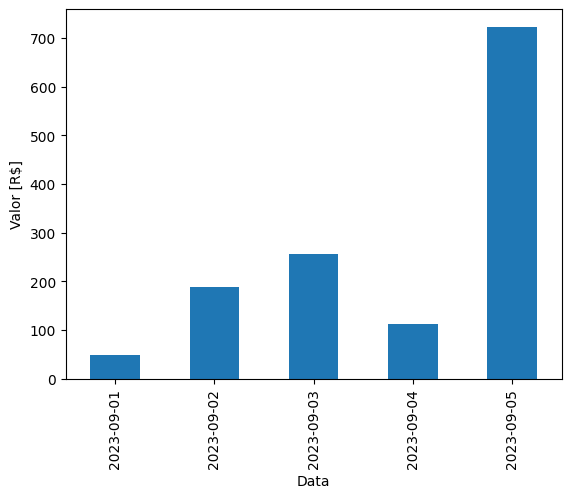

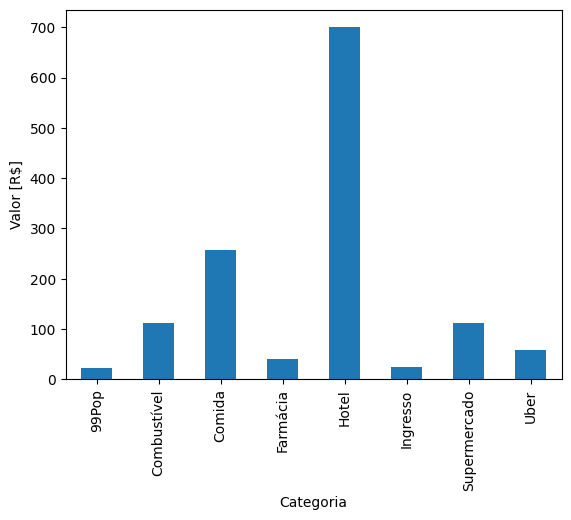

In [80]:
# carregando as transformações em um novo arquivo csv
total_gastos_pessoa.to_csv("gastos-por-pessoa.csv")

import csv

resultado = [
    [quem_paga, 'paga', deve_pagar],
]
with open('resultado.csv', 'w') as arquivo:
      escritor = csv.writer(arquivo)
      for linha in resultado:
          escritor.writerow(linha)


import matplotlib.pyplot as plt

# gráficos para facilitar a visualização
total_gastos_dia.plot(kind='bar')
plt.xlabel('Data')
plt.ylabel('Valor [R$]')
plt.show()

total_gastos_categoria.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Valor [R$]')
plt.show()